<a href="https://colab.research.google.com/github/fabnancyuhp/DEEP-LEARNING/blob/main/NOTEBOOKS/Spiral_dataset_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, there are 2 solved problems related to some datasets that are not linearly separable. We show that ANNs with more than one hidden layer can tackle non-linear problems.<br>
At the end of this notebook, there is an extra exercise illustrating the spars_categorical_crossentropy loss. 

# Exercise 1 : Spiral dataset with 2 classes
This example is inspired from https://cs231n.github.io/neural-networks-case-study/<br>
In this exercise, we are in the case of a non linearly separable problem.First, you have to run the cell below to create the dataset and to draw the dataset. We have some red points (label y=1) and some blue points (label y=0). Our goal is to construct a classifier to predict the color of a point.

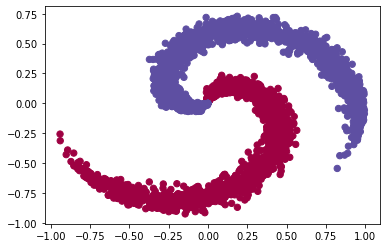

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 1800 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
Y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  Y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

1) What is the bacth-size of this problem? What is the shape of X and Y?

In [2]:
print("the batch size is: "+str(X.shape[0]))
print("the shape of X :"+str(X.shape))
print("the shape of Y :"+str(Y.shape))

the batch size is: 3600
the shape of X :(3600, 2)
the shape of Y :(3600,)


2) The goal of this exercise is to design a Neural network to predict the label of y. How many distinct labels do we have ?

In [3]:
print("the labels are: "+str(np.unique(Y)))
print("we have "+str(len(np.unique(Y)))+" distinct values")

the labels are: [0 1]
we have 2 distinct values


3) Split X, Y into a train set and a test set using train_test_split from the sklearn package.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

4) In this question you have to use the package tensorflow.keras to build a Neural network with the architecture:
    
    * InputLayer 
    * Dense layer with 10 units and activation='tanh'.
    * BatchNormalization()
    * Dense layer with 5 units and activation='tanh'.
    * BatchNormalization()
    * Dense layer with 1 units ,activation='sigmoid'


In [5]:
from tensorflow.keras.layers import Dense, BatchNormalization,InputLayer  
from tensorflow.keras.models import Sequential 

model = Sequential([InputLayer(input_shape=(X.shape[1],)),
                    Dense(10,activation='tanh',name='first_hidden'),
                    BatchNormalization(),
                    Dense(5,activation='tanh',name='second_hidden'),
                    BatchNormalization(),
                    Dense(1,activation='sigmoid')])


5) Compile and train the model you've just built in the previous question. Compute the accuracy score of the test set.

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=400,verbose=0)
model.evaluate(X_test, y_test)

38/38 [==============================] - 0s 2ms/step - loss: 7.9087e-32 - accuracy: 1.0000


[7.908731869804104e-32, 1.0]

6)Save your model in a h5 file.

In [8]:
model.save("./my_h5_model.h5")

7)Load the model you've just saved.

In [9]:
from tensorflow.keras.models import load_model
reconstructed_model = load_model("./my_h5_model.h5")
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden (Dense)        (None, 10)                30        
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 second_hidden (Dense)       (None, 5)                 55        
                                                                 
 batch_normalization_1 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 151
Trainable params: 121
Non-trainable pa

8)Get the weights from the first_hidden layer.

In [10]:
model.layers[0].get_weights() 
model.get_layer('first_hidden').get_weights()

[array([[-5.9458695e-02,  1.8748068e+01, -8.8379078e+00,  6.6291004e-02,
         -1.0201998e-02,  6.3330698e-01, -3.0188698e-01,  1.8918208e+00,
          2.8921202e-01, -8.5996282e-01],
        [-1.8298025e-01,  2.6860538e+00, -9.2578173e+00,  1.1765061e-01,
          1.0154924e-01,  3.9414892e-01,  1.3146083e+00, -7.4562377e-01,
          2.7250123e-01, -2.8049259e+00]], dtype=float32),
 array([-0.8661391 ,  0.23596272, -0.20089744, -1.1693009 ,  1.0183712 ,
        -0.3432039 , -2.172401  , -3.3382344 , -1.5846298 , -1.1705085 ],
       dtype=float32)]

# Exercise 2 : Spiral dataset with 3 classes
This exercise is inspired from https://cs231n.github.io/neural-networks-case-study/<br>
A teacher trained a keras model over a dataset that is not easily linearly separable. Run the cell below to generate a dataset close to the one used for the model trained by the teacher. There are three classes in that dataset distinguishable by their color.

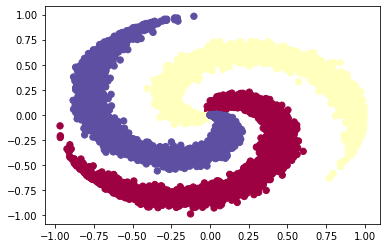

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 3500 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In the spiral dataset we've just created, we have 3 classes   

The teacher saved his model using the h5 format. Run the cell below to load the model.

In [3]:
import requests, io
import numpy as np
from tensorflow.keras.models import load_model
import h5py
url = "https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/teacher_model.h5"

r = requests.get(url)
teach_model = h5py.File(io.BytesIO(r.content),'r')
teacher_model = load_model(teach_model)

Teacher_model is a tensorflow.keras model. The output of the cell below means the model is a Sequential one. Our goal is to guess how the teacher designed his model. 

In [13]:
type(teacher_model)

keras.engine.sequential.Sequential

1) How many Dense Layers does teacher_model has? How many BatchNormalization() layer does this model have? How many Trainable params dose this model have? How many units does the last hidden layer have?

In [14]:
#1) How many Dense Layers does teacher_model has? answer : 4 Dense layers
#How many BatchNormalization() layer does this model have?  answer : 2 BatchNormalization layers
#How many Trainable params dose this model have? answer : 163 trainables parameters
#How many units does the last hidden layer have? answer : 3 units
teacher_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden (Dense)        (None, 10)                30        
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 second_hidden (Dense)       (None, 5)                 55        
                                                                 
 batch_normalization_1 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 third_hidden (Dense)        (None, 5)                 30        
                                                                 
 dense (Dense)               (None, 3)                 1

2) What is the weight matrix of the third hidden layer ?

In [4]:
#model.layers[0].get_weights() 
teacher_model.get_layer('third_hidden').get_weights()

[array([[ 0.74147016, -0.7957535 ,  0.67191696,  0.8986576 ,  0.18083209],
        [-1.4566284 , -0.9861701 ,  0.8741859 ,  0.08478148, -1.8854285 ],
        [ 0.03102238,  0.5847911 , -0.75338507,  0.5877253 ,  0.9950492 ],
        [ 0.9523286 , -0.48159003,  1.5990696 ,  1.0915468 , -0.37100694],
        [-0.31160182,  0.3829333 ,  0.4370279 ,  0.88894445,  0.41969505]],
       dtype=float32),
 array([-0.73652726,  0.43306306, -0.52848864,  0.9140984 , -0.63914084],
       dtype=float32)]

3) Make a prediction over np.array([[5.74323982e-05 ,5.68699218e-04]] using teacher_model. What kind of vector does this prediction return?

In [5]:
teacher_model.predict(np.array([[5.74323982e-05 ,5.68699218e-04]]))
#What kind of vector does this prediction return? answer : probability vector

1/1 [==============================] - 0s 257ms/step


array([[0.07867061, 0.5829137 , 0.3384157 ]], dtype=float32)

4) Try to build a neural network close to the teacher_model? You have to build it, to compile it. You have to train your neural network with the datset you've generated at the begining of this exercise.<br>
We will use loss='sparse_categorical_crossentropy' and we have 3 classes.

In [7]:
from tensorflow.keras.layers import Dense, BatchNormalization,InputLayer  
from tensorflow.keras.models import Sequential 

model = Sequential([InputLayer(input_shape=(X.shape[1],)),
                    Dense(10,activation='tanh',name='first_hidden'),
                    BatchNormalization(),
                    Dense(5,activation='tanh',name='second_hidden'),
                    BatchNormalization(),
                    Dense(5,activation='tanh',name='third_hidden'),
                    Dense(3,activation='softmax')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X,y,epochs=400,verbose=0)
model.evaluate(X, y)

329/329 [==============================] - 0s 936us/step - loss: 0.0099 - accuracy: 0.9979


[0.009936599992215633, 0.9979047775268555]

We make a prediction over np.array([[5.74323982e-05 ,5.68699218e-04]] using model.

In [15]:
probability_vector = model.predict(np.array([[5.74323982e-05 ,5.68699218e-04]]))
print(str(probability_vector))

class_pred = np.argmax(model.predict(np.array([[5.74323982e-05 ,5.68699218e-04]])))
print("predicted class is "+str(class_pred))

1/1 [==============================] - 0s 14ms/step
[[0.45582804 0.16339144 0.38078052]]
1/1 [==============================] - 0s 14ms/step
predicted class is 0


# Example 3 : sparse categorical crossentropy loss over 4 classes spiral dataset


Training a neural network involves passing data forward, through a model, and comparing predictions with ground truth labels. This comparison is done by a loss function. In multiclass classification problems, **sparse categorical crossentropy** loss is the loss function of choice. Run the cell below to create the data.



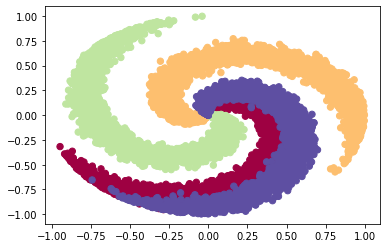

In [16]:
import numpy as np
import matplotlib.pyplot as plt
N = 4000 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

Our target is an integer value from { 0, 1, 2, 3 }.

In [ ]:
np.unique(y)

array([0, 1, 2, 3], dtype=uint8)

**In the cell below we define a model that handles our classification problem.**<br><br> 

We have to notice our last Dense responsible for output a probability vector has 4+1 units. Generally, when we want to use sparse categorical, the last Dense layer has n+1 units, where n equals the unique number of classes in our dataset.

In [17]:
from tensorflow.keras.layers import Dense, BatchNormalization 
from tensorflow.keras.models import Sequential

model_3 = Sequential()
model_3.add(Dense(10,activation='tanh',input_shape=(X.shape[1],)))
model_3.add(BatchNormalization())
model_3.add(Dense(10,activation='tanh'))
model_3.add(BatchNormalization())
model_3.add(Dense(5,activation='tanh'))
model_3.add(BatchNormalization())
model_3.add(Dense(4,activation='softmax'))
#model_3.add(Dense(5,activation='softmax'))

**Now, we compile our model with SparseCategoricalCrossentropy**:

In [19]:
import tensorflow as tf

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',\
                metrics=['Accuracy'])

**We split X, Y into a train set and a test set using train_test_split from the sklearn package.**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**We fit our model with 400 epochs:**

In [21]:
model_3.fit(X_train,y_train,epochs=400,verbose=0)
#model_3.evaluate(x_test,y_test)

**We evaluate our model over the test set**

In [22]:
model_3.evaluate(X_test,y_test)

165/165 [==============================] - 0s 1ms/step - loss: 0.1205 - Accuracy: 0.9568


[0.12051062285900116, 0.956818163394928]

**We apply our model to a new sample:**
  * we pass our new sample to the model
  * we find the predicted class 

In [23]:
vect_proba = model_3.predict(X_test[10].reshape(1,2))
vect_proba

1/1 [==============================] - 0s 72ms/step


array([[4.761687e-04, 2.965300e-07, 9.995166e-01, 6.948388e-06]],
      dtype=float32)

In [24]:
import numpy as np
predicted_class = np.argmax(vect_proba)
print("The true label is: "+str(y_test[10]))
print("The predicted label is: "+str(predicted_class))

The true label is: 2
The predicted label is: 2
